### Part II Overview:
Goal: create different plots for analysis for Restaurant, hotel, and landmarks
    
### Steps:
* create functions to extract infomations I needed
* use plotly to make interactive plots so that the user would be able to look at the plot more specifically
* use map to display the Top restaurants/hotels/landmarks

In [64]:
import sqlite3 as sql
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import plotly
import plotly.plotly as py  
import plotly.tools as tls   
from plotly.graph_objs import *
import numpy as np  
import plotly.graph_objs as go
import colorlover as cl
from collections import Counter

tls.set_credentials_file(
    username = 'stephanielamm',
    api_key = 'TWptiEW5ErM8ceWXqlaj')
mapbox_access_token = 'pk.eyJ1Ijoic3RhMTQxcHJvamVjdCIsImEiOiJjaXpxYWUyOHEwMTZ1MzNuNHp6b21zY2Y5In0.Vr6h57ZVuRRgfJ4RwW9wGw'

In [4]:
def get_df(keyterm):
    conn = sql.connect("accommodation.sqlite")
    df_graph = pd.read_sql("SELECT * FROM Best_" + keyterm, conn)
    return df_graph

In [8]:
df_food_final = get_df("Restaurants")

In [166]:
df_food_final.head()

,categories,city,display_phone,id,image_url,is_closed,name,rating,review_count,snippet_text,url,city_population,Latitude,Longitude
0,Thai,"Adelanto, CA",+1-760-246-8122,thai-siam-restaurant-adelanto,https://s3-media2.fl.yelpcdn.com/bphoto/W_GP2k...,0,Thai-Siam Restaurant,4.5,42,"So I wanted to listen to ""In the Aeroplane Ove...",https://www.yelp.com/biz/thai-siam-restaurant-...,"31,765",34.582769,-117.409214
1,Mexican,"Adelanto, CA",+1-760-530-2800,rauls-mexican-food-adelanto,https://s3-media2.fl.yelpcdn.com/bphoto/giLLG1...,0,Raul's Mexican Food,4.0,32,Agreed with the good reviews here. Good place...,https://www.yelp.com/biz/rauls-mexican-food-ad...,"31,765",34.582769,-117.409214
2,Mexican,"Adelanto, CA",+1-760-246-4751,miguelitos-family-restaurant-adelanto,https://s3-media4.fl.yelpcdn.com/bphoto/aHMsj-...,0,Miguelitos Family Restaurant,4.0,14,This is the place to come to after a night out...,https://www.yelp.com/biz/miguelitos-family-res...,"31,765",34.582769,-117.409214
3,American (New),"Adelanto, CA",+1-760-246-8400,fat-boyz-grill-adelanto,https://s3-media3.fl.yelpcdn.com/bphoto/H2QJry...,0,Fat Boyz Grill,3.5,27,Great place nice atmosphere wonderful staff fr...,https://www.yelp.com/biz/fat-boyz-grill-adelan...,"31,765",34.582769,-117.409214
4,Mexican,"Adelanto, CA",+1-760-530-9161,rubios-adelanto-3,https://s3-media1.fl.yelpcdn.com/bphoto/pwqZeG...,0,Rubio's,4.0,82,I love this place! Food is always amazing and ...,https://www.yelp.com/biz/rubios-adelanto-3?adj...,"31,765",34.582769,-117.409214


* Since there are many different categories in restaurants, we will only focus on the top 10 most frequent cateogries

In [14]:
def freq_cat(df):
    """
    get the Top 10 most frequent category labels (Overall)
    argument: dataframe
    return: dataframe of top 10 category
    """
    count = []
    for i in range(0,len(df)):
        data = df['categories'][i]
        count.append(data)
        freq = Counter(count)
        
    count_df = pd.DataFrame(freq.most_common()[0:10])
    return count_df

In [15]:
def freq_bar_plot(df, keyterm, colors):
    """
    Argument: dataframe, keyterm, colors
    Return: bar plot of the top 10 most frequent category
    """
    data = [go.Bar(x= count_df[0],y= count_df[1],
            marker=dict(color = colors))]
    layout = go.Layout(title='Top 10 Most Frequent Category of %s' %keyterm)
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig, filename = 'Top 10 most frequent category of %s' %keyterm)

In [16]:
#get the most frequent category labels
count_df = freq_cat(df_food_final)

#most frequent category for Restaurant
colors = cl.scales['10']['div']['RdYlBu']
freq_bar_plot(count_df, "Restaurant", colors)

From the bar plot, we can see that Mexican food is the most popular. 

The functions below are for having a better understanding of how the categories are distributed in differnt rating.

In [18]:
def get_count(category, df):
    """count the rating
    return: the labels and values"""
    count_list =[]
    for i in range(len(df)):
        if df['categories'][i] == category:
            count_list.append(df['rating'][i])       
    labels, values = zip(*Counter(count_list).items()) 
    count_list =[] 
    return labels, values


def get_cat_count(dataframe, df):
    """loop through the categories and get all the rating count by category"""
    cat_count = []
    for i in range(0, len(dataframe[0])):
        count = get_count(dataframe[0][i], df)
        cat_count.append(count)
    return cat_count

In [19]:
def star_dist_plot(df, keyterm):
    """stack plot of the Distribution of stars(by category)"""
    count_df = freq_cat(df)
    cat_count = get_cat_count(count_df, df)
    trace = dict()
    
    for i in range(0, len(cat_count)):
        trace[i] = go.Bar(x = cat_count[i][0], y=cat_count[i][1], name= count_df[0][i])

    data = [trace[i] for i in trace]
    layout = go.Layout(barmode = 'stack', title ='Rating stars distribution (by categeory) for %s' %keyterm
    )

    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='Rating stars distribution (by categeory) for %s' %keyterm)

In [20]:
#stack plot
star_dist_plot(df_food_final, "Restaurant")

We can see that most of the restaurants have 4 stars rating or higher, so we can tell that, CA overall has pretty posh restaurants.

In [59]:
def average_city(dataframe, category):
    """get the average star rating (by City)"""
    average_rate = dataframe.groupby('city')[category].mean()
    average_rate = average_rate.reset_index()
    average_rate = pd.DataFrame(average_rate)
    return average_rate

def city_rating(df):
    """return dataframe of both average rating and review count"""
    rating_star = average_city(df, 'rating')
    average_review = average_city(df, 'review_count')
    
    rating_star = pd.merge(rating_star, average_review, on= 'city')
    
    #subset the city, latitude, and longitude from the df and create new df
    pd_geo = df[['city','Latitude ','Longitude']]
    pd_geo = pd_geo.drop_duplicates()
    pd_geo = pd_geo.reset_index()
    
    #combine the dataframes together by city name
    rating_star = pd.merge(rating_star, pd_geo, on='city')
    return rating_star

In [60]:
def city_rating_map(df, keyterm, scale):
    """
    function created to plot the map of average rating by city
    """
    df['text'] = 'City: ' + df['city'] + ' <br>Rating: ' + df['rating'].astype(np.str) +' star' + '<br>Average Reviews count: ' + df['review_count'].astype(np.str)
    limits = [(1,3),(3,3.5),(3.5,4),(4,4.5),(4.5,5)]
    colors = ["lightgrey","lightgreen","lightblue","lightyellow","red"]
    cities = []

    for i in range(len(limits)):
        lim = limits[i]
        rate_sub = df.query('%f' %lim[0] +'<= rating < %f' %lim[1])
        city = dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = rate_sub['Longitude'],
            lat = rate_sub['Latitude '],
            text = rate_sub['text'],
            marker = dict(
                size = rate_sub['review_count'] / scale,
                color = colors[i],
                line = dict(width=0.5, color='rgb(40,40,40)'),
                sizemode = 'area'
            ),
            name = '{0} - {1} stars'.format(lim[0],lim[1]))
        cities.append(city)

    layout = dict(
            title = '%s Average Rating by City<br>(Click legend to toggle traces)'%keyterm,
            showlegend = True,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showland = True,
                landcolor = 'rgb(217, 217, 217)',
                subunitwidth=1,
                countrywidth=1,
                subunitcolor="rgb(255, 255, 255)",
                countrycolor="rgb(255, 255, 255)",
                lonaxis = dict( range= [ -124.5, -114.0 ] ),
                lataxis = dict( range= [ 32.0, 42.0 ] )
            ),
        
        )

    fig = dict( data=cities, layout=layout )
    return py.iplot(fig, validate=False, filename='%s average rating by city'%keyterm)

In [61]:
rating_star = city_rating(df_food_final)
city_rating_map(rating_star,'Restaurant', 2.5)

In the map, the bigger dots indicate higher average review count.
we see that most of the restaurants in different cities are between 4 and 4.5 stars. 
And there are currently no city that has a average rating higher than 4.5.

In [67]:
def limit_data(df):
    """restrict to top 10 category """
    restricted_data = pd.DataFrame()
    for i in range(0, len(df)):
        for j in range(0, len(count_df)):
            # restrict to top 10 category
            if df['categories'][i] == count_df[0][j]:
                data = df.iloc[i]
                restricted_data = restricted_data.append(data ,ignore_index=True)
    return restricted_data

In [146]:
restricted_food = limit_data(df_food_final)

We want the users to be able to look at where are the top 3 restaurants located by the category they want.
We created a function to extract the top 3 restaurants by categories and then plot the locations on a map.

In [116]:
def top3by_cat(category, df, keyterm):
    """top 3 restaurant by category"""
    temp = pd.DataFrame()
    for i in range(0, len(df)):
        if keyterm == 'restaurant':
            cat = df['categories'][i]
        elif keyterm == 'hotels':
            cat = df['type'][i]
               
        if cat == category:
            data = df.iloc[i]
            temp = temp.append(data, ignore_index=True)

    best_3 = temp.groupby('rating')['review_count'].nlargest(10).reset_index()
    best_3 = pd.DataFrame(best_3)
    df_best3 = pd.DataFrame()
    for i in range(0,len(best_3)):
        if best_3['rating'][i] == 5.0:
            top = temp.iloc[[best_3['level_1'][i]]]
            df_best3 = pd.concat([top,df_best3],ignore_index = True)
            df_best3 = df_best3.drop_duplicates(['name'])
            if len(df_best3) == 3:
                break
    if len(df_best3) < 3:
        for i in range(0, len(best_3)):
            if best_3['rating'][i] == 4.5:
                top = temp.iloc[[best_3['level_1'][i]]]
                df_best3 = pd.concat([top,df_best3],ignore_index = True)
                df_best3 = df_best3.drop_duplicates(['name'])
                if len(df_best3) == 3:
                    break
            else:
                break
    return df_best3

In [121]:
def top3_map(categories, df, keyterm):
    """plot the map of the top 3 restaurant for each category"""
    trace = dict()
    color = cl.scales['10']['div']['Spectral']
    for i in range(0, len(categories)-1):
        df_best3 =  top3by_cat(categories[i], df, keyterm)
        df_best3 = df_best3.iloc[::-1] 
        df_best3['text'] = 'Name: ' + df_best3['name'] + '<br>City: ' + df_best3['city'] +'<br>Rating: ' + df_best3['rating'].astype(np.str)+ ' star' + '<br>Reviews count: ' + df_best3['review_count'].astype(np.str)  
        trace[i] =  Scattermapbox(
                        lat=df_best3['Latitude '],
                        lon=df_best3['Longitude'],
                        mode='markers',
                        marker = Marker(
                            size=15,
                            color= color[i],
                            opacity=0.7),
                        text=df_best3['text'],
                        name = '%s' %categories[i]
                    ) 

    data = Data([trace[i] for i in trace])

    layout = Layout(
        title = 'Top 3 %s in California by category'%keyterm,
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=36.5,
                lon=-120
            ),
            pitch=0,
            zoom=4.8
        ),
    )
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, filename='Top 5 %s by category'%keyterm, validate=False)

top3_map(count_df[0], restricted_data, 'restaurant')

Most of the top 3 restaurants are located near San Francisco and the Los Angeles to San Diego area.

In [126]:
from PIL import Image
import urllib, cStringIO
from IPython.display import display

def display_img(category, df, keyterm):
    category = unicode(category)
    """image of the top 3 restaurants by category """
    image_url = []
    for i in range(0, 3):
        dfbest3 = top3by_cat(category, df, keyterm)
        dfbest3 = dfbest3.iloc[::-1]
        url = dfbest3['image_url'][i]
        image_url.append(str(url))
    print 'Image of the top 3 %s restaurants:' %category
    for image in image_url :
        link = cStringIO.StringIO(urllib.urlopen(image).read())
        img = Image.open(link) 
        display(img)
    return

Image of the top 3 Mexican restaurants:


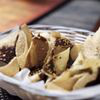

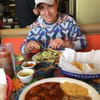

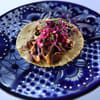

In [127]:
#For example:
display_img('Mexican', restricted_food, 'restaurant')

## Hotels

In [129]:
df_hotels_final = get_df("Hotels")

In [130]:
df_hotels_final.head()

,categories,city,display_phone,id,image_url,is_closed,name,rating,review_count,snippet_text,url,city_population,Latitude,Longitude
0,Hotels,"Adelanto, CA",+1-760-530-2200,americas-best-value-inn-adelanto,https://s3-media3.fl.yelpcdn.com/bphoto/MMsVJg...,0,Americas Best Value Inn,3.5,11,"Stayed one night there. Neat, quite and comfor...",https://www.yelp.com/biz/americas-best-value-i...,"31,765",34.582769,-117.409214
1,Hotels,"Adelanto, CA",+1-760-952-1200,hilton-garden-inn-victorville-victorville,https://s3-media2.fl.yelpcdn.com/bphoto/qrmyBV...,0,Hilton Garden Inn Victorville,3.5,62,So far I only have 2 complaints about this pla...,https://www.yelp.com/biz/hilton-garden-inn-vic...,"31,765",34.582769,-117.409214
2,Hotels,"Adelanto, CA",+1-888-293-5571,hawthorn-suites-by-wyndham-victorville-victorv...,https://s3-media2.fl.yelpcdn.com/bphoto/pKLe22...,0,Hawthorn Suites By Wyndham Victorville,3.5,25,"Booked this hotel for my parents, they wanted...",https://www.yelp.com/biz/hawthorn-suites-by-wy...,"31,765",34.582769,-117.409214
3,Hotels,"Adelanto, CA",+1-760-949-9900,la-quinta-inn-and-suites-hesperia-victorville-...,https://s3-media2.fl.yelpcdn.com/bphoto/dGFxdg...,0,La Quinta Inn & Suites Hesperia Victorville,4.0,24,Good clean hotel. No pet fee. Okay not great d...,https://www.yelp.com/biz/la-quinta-inn-and-sui...,"31,765",34.582769,-117.409214
4,Venues & Event Spaces,"Adelanto, CA",+1-760-245-6565,holiday-inn-victorville-victorville-2,https://s3-media4.fl.yelpcdn.com/bphoto/Zv95eb...,0,Holiday Inn Victorville,3.0,36,Being a Platinum Elite member with IHG the cor...,https://www.yelp.com/biz/holiday-inn-victorvil...,"31,765",34.582769,-117.409214


In [131]:
#get the most frequent category labels
count_df = freq_cat(df_hotels_final)
colors = ['rgba(222,45,38,0.8)', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey', 'grey']
freq_bar_plot(count_df, 'Hotels', colors)

From the dataframe we got from yelp, the Hotel category doesn't contain much varieties of category. 
Therefore, to better analysis the hotel data, we will first restrict the data to those that are indeed Hotels, and look at the pie chart of the star distribution and map of average rating in each city

In [136]:
def restrict_df(df, category):
    """limit the dataframe to only the category we want"""
    df_limit = pd.DataFrame()
    for i in range(0, len(df)):
            if df['categories'][i] == category:
                df_limit = pd.concat([df.iloc[[i]],df_limit], ignore_index = True)
    return df_limit

category = u'Hotels'
df_limit_hotels = restrict_df(df_hotels_final, category)

In [143]:
def star_pie(df, keyterm):
    """star distribution in the category 'Hotels'"""
    labels, values = zip(*Counter(df).items()) 

    fig = {'data': [{'labels': labels,'values': values,'type': 'pie'}],
    'layout': {'title': "Pie chart of star distribution in the category '%s'" %keyterm}}
    return py.iplot(fig, filename = "star distribution in the category %s" %keyterm)

In [144]:
star_pie(df_limit_hotels['rating'], 'Hotels')

From the pie chart, we can see that the majority of hotels are between 3 to 4 stars. 
There is only 3.04% of hotels are rated 5 stars while 26.7% are 3.5 stars.

In [145]:
hotel_rating = city_rating(df_limit_hotels)
city_rating_map(hotel_rating,'Hotels', 1)

Compared to the restaurants category, there are actually quite a lot of cities that has a average hotel rating between 1 - 3 stars. The only 2 red dots in the map: the dot in Exeter is very small and the average reviews count is only 14, indicating that even though it has a average 4.5 rating in the city, there might be just one hotel in the city. On the other hand, the hotels in Palm Spring is very nice because the average review count is very high.

To find the top hotels in California, we wanted the user to be able to look at the top of different kinds of hotel such as hotel, motel, inn, and etc. Therefore, we group the hotels into different categories by finding the pattern within their name.

In [140]:
def find_pattern(kind, df):
    """find the pattern in names"""
    frame = pd.DataFrame()
    for i in range(0, len(df)):
        if kind in df['name'][i].lower():
            temp = df.iloc[i]
            frame = frame.append(temp)
            frame = pd.DataFrame(frame)
    return frame
    
hotel_group = pd.DataFrame()
kinds = [u'hotel', u'motel', u'inn', u'suites', u'lodge', u'resort', u'villas']
for i in range(0, len(kinds)):
    group = find_pattern(kinds[i], df_limit_hotels)
    group['type'] = kinds[i]
    #create new dataframe
    hotel_group = pd.concat([hotel_group, group], ignore_index = True)

In [142]:
top3_map(kinds, hotel_group, 'hotels')

Same as the restaurant category, most top hotels are located near San Francisco and LA-SD area

## Landmarks

In [147]:
df_landmarks_final = get_df("Landmarks")

In [148]:
#get the most frequent category labels
count_df = freq_cat(df_landmarks_final)
#plot of the most frequent category for Landmarks
colors = ['rgba(222,45,38,0.8)', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey', 'grey']
freq_bar_plot(count_df, 'Landmarks', colors)

In [151]:
category = u'Landmarks & Historical Buildings'
df_limit_landmarks = restrict_df(df_landmarks_final, category)

In [152]:
star_pie(df_limit_landmarks['rating'], 'Landmarks')

From the pie chart, most landmarks seem to have high rating, ranged from 4 to 5 stars. 

In [153]:
landmark_rating = city_rating(df_limit_landmarks)
city_rating_map(landmark_rating,'Landmarks', 1)

From the previous plot and this map, we see that landmarks have dramatically more cities that are highly-rated. And most of them also have high average review count.

In [154]:
df_limit_landmarks['name'][0:10]

0                               City of Redlands
1                        Lincoln Memorial Shrine
2                  Center For Sacramento History
3                     Rickey Ranch Pumpkin Patch
4    Marshall Gold Discovery State Historic Park
5                                Old Town Auburn
6                             Loomis Train Depot
7                   Maidu Museum & Historic Site
8              Sutter's Fort State Historic Park
9    Leland Stanford Mansion State Historic Park
Name: name, dtype: object

Since we focused on only the landmarks and historical building category and there is no pattern in their names, we will find and plot the top 10 landmarks in California instead.

In [155]:
def find_best_10(data, df):
    """get the best 10"""
    df_best_10 = pd.DataFrame()
    for i in range(0,len(data)):
        if data['rating'][i] == 5.0:
            top = df.iloc[[data['level_1'][i]]]
            df_best_10 = pd.concat([top,df_best_10],ignore_index = True)
            df_best_10 = df_best_10.drop_duplicates(['name'])
            if len(df_best_10) == 10:
                break
        if len(df_best_10) < 10:
            for i in range(0, len(data)):
                if data['rating'][i] == 4.5:
                    top = df.iloc[[data['level_1'][i]]]
                    df_best_10 = pd.concat([top,df_best_10],ignore_index = True)
                    df_best_10 = df_best_10.drop_duplicates(['name'])
                    if len(df_best10) == 10:
                        break
                else:
                    break
    return df_best_10

def best10(df):
    """dataframe of the top 10 landmarks"""
    best_10 = df.groupby('rating')['review_count'].nlargest(10).reset_index()
    best_10 = pd.DataFrame(best_10)
    df_best_10 = find_best_10(best_10, df)
    df_best_10 = df_best_10.iloc[::-1]
    return df_best_10

In [156]:
best_10 = df_limit_landmarks.groupby('rating')['review_count'].nlargest(10).reset_index()
df_best_10 = pd.DataFrame()
for i in range(0,len(best_10)):
    if best_10['rating'][i] == 5.0:
        top = df_limit_landmarks.iloc[[best_10['level_1'][i]]]
        df_best_10 = pd.concat([top,df_best_10],ignore_index = True)
        df_best_10 = df_best_10.drop_duplicates(['name'])
        if len(df_best_10) == 10:
            break
if len(df_best_10) < 10:
    for i in range(0,len(best_10)):
        if best_10['rating'][i] == 4.5:
            top = df_limit_landmarks.iloc[[best_10['level_1'][i]]]
            df_best_10 = pd.concat([top,df_best_10],ignore_index = True)
            df_best_10 = df_best_10.drop_duplicates(['name'])
            if len(df_best_10) == 10:
                break
                
df_best_10 = df_best_10.iloc[::-1]

In [158]:
df_landmark_best_10 = df_best_10.reset_index()
df_landmark_best_10

,index,categories,city,display_phone,id,image_url,is_closed,name,rating,review_count,snippet_text,url,city_population,Latitude,Longitude
0,5,Landmarks & Historical Buildings,"Solana Beach, CA",+1-858-459-2314,mount-soledad-veterans-memorial-la-jolla,https://s3-media1.fl.yelpcdn.com/bphoto/9ZeHuP...,0,Mount Soledad Veterans Memorial,5.0,342,What a great way of paying tribute to our fall...,https://www.yelp.com/biz/mount-soledad-veteran...,"12,867",32.991156,-117.271147
1,4,Landmarks & Historical Buildings,"Brisbane, CA",+1-415-556-1693,fort-point-san-francisco,https://s3-media2.fl.yelpcdn.com/bphoto/SocN3O...,0,Fort Point,5.0,302,Such a cool landmark and piece of California :...,https://www.yelp.com/biz/fort-point-san-franci...,"4,282",37.680767,-122.399972
2,3,Landmarks & Historical Buildings,"King City, CA",+1-805-924-1628,friends-of-the-elephant-seals-at-piedras-blanc...,https://s3-media4.fl.yelpcdn.com/bphoto/ds_VCs...,0,Friends of the Elephant Seals at Piedras Blancas,5.0,241,Elephant seals! \n\nThis is a very cool experi...,https://www.yelp.com/biz/friends-of-the-elepha...,"12,874",36.212744,-121.126028
3,2,Landmarks & Historical Buildings,"Larkspur, CA",+1-415-921-5858,golden-gate-bridge-san-francisco,https://s3-media1.fl.yelpcdn.com/bphoto/PbumJn...,0,Golden Gate Bridge,4.5,1479,It's a bridge. It's functional.\n\n5/5,https://www.yelp.com/biz/golden-gate-bridge-sa...,"11,926",37.934092,-122.535253
4,0,Landmarks & Historical Buildings,"El Cerrito, CA",+1-415-563-6504,palace-of-fine-arts-san-francisco,https://s3-media3.fl.yelpcdn.com/bphoto/qrVb0N...,0,Palace Of Fine Arts,4.5,772,"Of all my times coming to NorCal, I finally to...",https://www.yelp.com/biz/palace-of-fine-arts-s...,"23,549",37.916133,-122.310764


In [159]:
import random
for i in range(0, len(df_landmark_best_10)):
    rand = dict()
    rand[i] = random.uniform(0,0.001)
    df_landmark_best_10['Latitude '][i] = df_landmark_best_10['Latitude '][i] + rand[i]
    df_landmark_best_10['Longitude'][i] = df_landmark_best_10['Longitude'][i] + rand[i]

/Users/stephanie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/stephanie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
def best_5_map(dataframe, keyterm):
    """map of the top 10 landmarks"""
    dataframe['text'] = 'Name: ' + dataframe['name'] + '<br>City:' + dataframe['city'] +'<br>Rating: ' + dataframe['rating'].astype(np.str)+ ' star' + '<br>Reviews count: ' + dataframe['review_count'].astype(np.str) 
    color = cl.scales['10']['div']['Spectral']
    
    data = Data([
        Scattermapbox(
            lat=dataframe['Latitude '],
            lon=dataframe['Longitude'],
            mode='markers',
            marker=Marker(
                size=17,
                color=[color[i] for i in range(0, len(color))],
                opacity=0.7
            ),
            text=dataframe['text'],
        )
    ])

    layout = Layout(
        title = 'Top 5 %s in California'%keyterm,
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=35,
                lon=-120
            ),
            pitch=0,
            zoom=4.5
        ),
    )

    fig = dict(data=data, layout=layout)
    return py.iplot(fig, filename='Top 10 %s'%keyterm, validate=False)

In [165]:
best_5_map(df_landmark_best_10, 'Landmarks')

Different than the restaurant and hotel category, out of the 5 top landmarks, 3 of them are located in San Francisco.